In [1]:
#-----------------------------------------------------------------
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    
#-----------------------------------------------------------------
def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat
#-----------------------------------------------------------------    

In [2]:
def points_to_PCA(points):
    df=pd.DataFrame(points)
    df.columns=[['x','y','z']]
    threshold= df_pts['z'].min().values[0]*0.998
    print (threshold)
    rslt_df = df.loc[df[df['z'] > threshold].index]
    points=rslt_df[['x','y','z']].dropna().values
    Pca=PCA(n_components=3)
    Pca.fit(points)
    print('Pca.explained_variance_',Pca.explained_variance_)
    ## HOMOGENEUS
    E_R= np.zeros((4,4))
    E_R[:3,:3]+=R
    E_R[-1,-1]=1
    return     E_R


In [3]:
def points_to_PCA(points):
    df=pd.DataFrame(points)
    df.columns=[['x','y','z']]
    threshold= df_pts['z'].min().values[0]*0.998
    print (threshold)
    rslt_df = df.loc[df[df['z'] > threshold].index]

    
    points=rslt_df[['x','y','z']].dropna().values
    Pca=PCA(n_components=3)
    Pca.fit(points)
    #print('Pca.explained_variance_',Pca.explained_variance_)
    ref=np.eye(3)
    pcas=Pca.components_
    R=[]
    R.append(np.dot(pcas[0],ref))
    R.append(np.dot(pcas[1],ref))
    R.append(np.dot(pcas[2],ref))
    R=np.asarray(R)
    ## HOMOGENEUS
    E_R= np.zeros((4,4))
    E_R[:3,:3]+=R
    E_R[-1,-1]=1
    return     E_R


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import tf

/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [16]:
points=np.load('/home/roboworks/Documents/points2.npy')
df_pts=pd.DataFrame(points.transpose())
df_pts.columns=[['x','y','z']]
threshold= df_pts['z'].min().values[0]*0.998
print (threshold)
rslt_df_pts = df_pts[['x','y','z']][df_pts[['x','y','z']] > threshold]
print (rslt_df_pts.describe())
newpoints=rslt_df_pts[['x','y','z']].values
E_R=points_to_PCA(newpoints)
print(np.rad2deg(tf.transformations.euler_from_matrix(E_R)))
print(np.sign(np.rad2deg(tf.transformations.euler_from_matrix(E_R))[0])*np.rad2deg(tf.transformations.euler_from_matrix(E_R))[1])

-0.00020127125104772858
                 x            y            z
count  7035.000000  1751.000000  7033.000000
mean      3.000815     0.027068     0.108585
std       0.280315     0.016597     0.106096
min       2.707370    -0.000079    -0.000201
25%       2.817379     0.012376    -0.000101
50%       2.867103     0.025639     0.091614
75%       3.136499     0.041149     0.202052
max       3.716195     0.057267     0.336092
-0.00020127125104772858
[-94.64628425  -0.48914641 169.6480719 ]
0.48914641179171825


In [14]:
points=np.load('/home/roboworks/Documents/points2.npy')


#points_to_PCA(points.transpose())
points.transpose().shape

(7035, 3)

In [13]:
points.shape

(296, 3)

In [95]:
points_to_PCA(points)

0.020093663327395917
Pca.explained_variance_ [0.09691025 0.00265999 0.00018335]


array([[ 0.98336387,  0.02259623, -0.18023539,  0.        ],
       [-0.18056083,  0.01328444, -0.98347396,  0.        ],
       [ 0.01982848, -0.99965632, -0.01714361,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

[ WARN] [1743781852.631419929]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 639.455000 according to authority /pose_integrator
[ WARN] [1743781852.631503022]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 639.455000 according to authority /pose_integrator
[ WARN] [1743781852.631566763]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 639.455000 according to authority /pose_integrator
[ WARN] [1743781852.631624324]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 639.455000 according to authority /pose_integrator
[ WARN] [1743781852.631678784]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 639.455000 according to authority /pose_integrator
[ WARN] [1743781852.631730606]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 6

In [96]:
df_pts

,x,y,z
0,3.389726,0.056739,0.127598
1,3.389788,0.052852,0.127581
2,3.389850,0.048965,0.127565
3,3.389912,0.045078,0.127548
4,3.389975,0.041190,0.127531
...,...,...,...
7030,2.836485,-0.152103,-0.000083
7031,2.836502,-0.155391,-0.000083
7032,2.836518,-0.158680,-0.000083
7033,2.836535,-0.161969,-0.000083


[ WARN] [1743781858.322302878]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 640.381000 according to authority /pose_integrator
[ WARN] [1743781858.322372096]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 640.381000 according to authority /pose_integrator
[ WARN] [1743781858.322426805]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 640.381000 according to authority /pose_integrator
[ WARN] [1743781858.322475239]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 640.381000 according to authority /pose_integrator
[ WARN] [1743781858.322531282]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 640.381000 according to authority /pose_integrator
[ WARN] [1743781858.322575381]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 6

[ WARN] [1743781919.962767447]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 650.754000 according to authority /pose_integrator
[ WARN] [1743781919.962875558]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 650.754000 according to authority /pose_integrator
[ WARN] [1743781919.962953921]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 650.754000 according to authority /pose_integrator
[ WARN] [1743781919.963016573]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 650.754000 according to authority /pose_integrator
[ WARN] [1743781919.963087971]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 650.754000 according to authority /pose_integrator
[ WARN] [1743781919.963149572]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 6

[ WARN] [1743781983.228406919]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 661.641000 according to authority /pose_integrator
[ WARN] [1743781983.228489257]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 661.641000 according to authority /pose_integrator
[ WARN] [1743781983.228549896]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 661.641000 according to authority /pose_integrator
[ WARN] [1743781983.228611384]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 661.641000 according to authority /pose_integrator
[ WARN] [1743781983.228667745]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 661.641000 according to authority /pose_integrator
[ WARN] [1743781983.228721564]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 6

In [ ]:
rslt_df_pts

-98.63997914 -40.27221135 107.26441686<br>
[ 97.6089583  -39.13610332 119.11722414]<br><br><br><br><br><br><br><br><br>

In [ ]:
tf.transformations.euler_from_quaternion((0.62734299, 0.40730226, 0.66127357, 0.05712182))

In [ ]:
e_ER=tf.transformations.euler_from_matrix(E_R)
q_ET=tf.transformations.quaternion_from_euler(e_ER[0],e_ER[1],e_ER[2])
print (q_ET)

In [ ]:
quat=tf.transformations.quaternion_from_matrix(E_R)
print(tf.transformations.euler_from_matrix(E_R))
print(quat)

In [57]:
points.shape

(7035, 3)

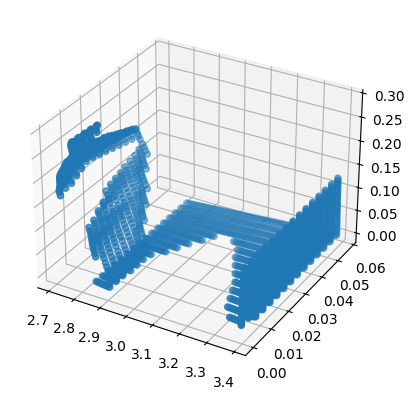

In [58]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])

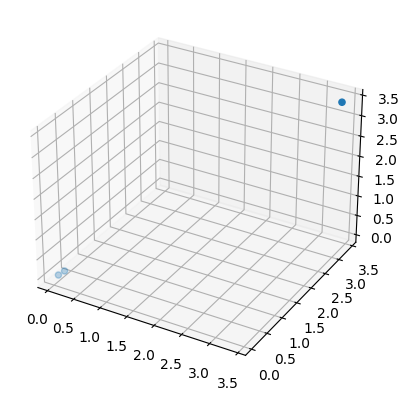

In [20]:
points=np.load('/home/roboworks/Documents/points2.npy')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])

In [69]:
import seaborn as sns
import pandas as pd
df=pd.DataFrame(points)
df.columns=['x','y','z']
df.describe()

,x,y,z
count,7035.000000,1751.000000,7033.000000
mean,3.000815,0.027068,0.108585
std,0.280315,0.016597,0.106096
min,2.707370,-0.000079,-0.000201
25%,2.817379,0.012376,-0.000101
50%,2.867103,0.025639,0.091614
75%,3.136499,0.041149,0.202052
max,3.716195,0.057267,0.336092


In [70]:
rslt_df = df[df['z'] > 0.02]


In [72]:
rslt_df.describe()

,x,y,z
count,4373.000000,975.000000,4373.000000
mean,2.879517,0.020894,0.174206
std,0.177241,0.015270,0.081918
min,2.707370,-0.000079,0.020134
25%,2.786320,0.009185,0.107490
50%,2.833725,0.018048,0.177359
75%,2.876351,0.029611,0.239361
max,3.390669,0.057179,0.336092


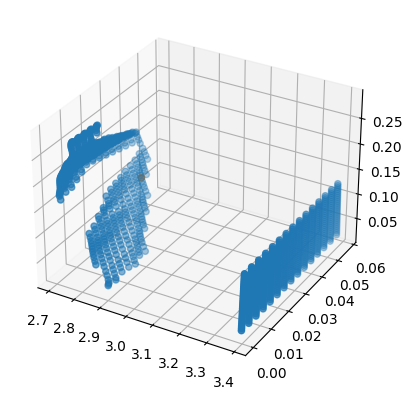

In [73]:
#points=rslt_df[['x','y','z']].sample(30).values
points=rslt_df[['x','y','z']].values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])
pt=rslt_df[['x','y','z']].mean().values
ax.scatter(pt[0],pt[1],pt[2],'o')

In [74]:
E_R=points_to_PCA(points)
E_R

0.020093663327395917
Pca.explained_variance_ [0.09691025 0.00265999 0.00018335]


array([[ 0.98336387,  0.02259623, -0.18023539,  0.        ],
       [-0.18056083,  0.01328444, -0.98347396,  0.        ],
       [ 0.01982848, -0.99965632, -0.01714361,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

[ WARN] [1743781494.278177572]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 592.020000 according to authority /pose_integrator
[ WARN] [1743781494.278245105]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 592.020000 according to authority /pose_integrator
[ WARN] [1743781494.278288510]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 592.020000 according to authority /pose_integrator
[ WARN] [1743781494.278335542]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 592.020000 according to authority /pose_integrator
[ WARN] [1743781494.278386882]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 592.020000 according to authority /pose_integrator
[ WARN] [1743781494.278437214]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 5

[-92.55031776  -0.92126908 118.62054193]<br>
[-98.61322822 -44.31230308 106.44802105]<br>
[106.458072   -64.33138726 112.32396092]<br>



In [ ]:

print(np.rad2deg(tf.transformations.euler_from_matrix(E_R)))

In [ ]:
print(np.rad2deg(tf.transformations.euler_from_matrix(E_R)))

In [ ]:
quat=tf.transformations.quaternion_from_matrix(E_R)
print(tf.transformations.euler_from_matrix(E_R))

In [ ]:
points=rslt_df[['x','y','z']].dropna().values
pt=rslt_df[['x','y','z']].mean().values


In [ ]:
from sklearn.decomposition import PCA
Pca=PCA(n_components=3)
Pca.fit(points)
        

print(Pca.singular_values_)
print(Pca.explained_variance_)
norm_expl=Pca.explained_variance_/Pca.explained_variance_.sum()
norm_expl

In [ ]:
Pca.components_

In [ ]:
#points=rslt_df[['x','y','z']].sample(300).values
points=rslt_df[['x','y','z']].values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])
pt=rslt_df[['x','y','z']].mean().values
ax.scatter(pt[0],pt[1],pt[2],'o')


In [ ]:
Pca.components_


In [ ]:
np.cross(Pca.components_[0],Pca.components_[1])

In [ ]:
pt=rslt_df[['x','y','z']].mean().values
pts_1=[]
pts_2=[]
pts_3=[]
p_1=[]
p_2=[]
p_3=[]

pts_1.append(pt)
pts_2.append(pt)
pts_3.append(pt)
for i in range (-5,5):
    
    pts_1.append(pt +Pca.components_[0]*i/30 )
    p_1.append(pt + (np.eye(3)[0]*i/30) )
    pts_2.append(pt +Pca.components_[1]*i/30 )
    p_2.append(pt + (np.eye(3)[1]*i/30) )
    pts_3.append(pt +Pca.components_[2]*i/30 )
    p_3.append(pt + (np.eye(3)[2]*i/30) )

pts_1=np.asarray(pts_1)  
pts_2=np.asarray(pts_2)    
pts_3=np.asarray(pts_3)    
ps_x=np.asarray(p_1)  
ps_y=np.asarray(p_2)  
ps_z=np.asarray(p_3)  

In [ ]:
fig = plt.figure()
#points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.051,c='c')
ax.scatter(pts_1[:,0],pts_1[:,1],pts_1[:,2],c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],pts_2[:,2],c='g')
ax.scatter(pts_3[:,0],pts_3[:,1],pts_3[:,2],c='b')
#ax.scatter(ps_x[:,0],ps_x[:,1],ps_x[:,2],alpha=0.25,c='r')
#ax.scatter(ps_y[:,0],ps_y[:,1],ps_y[:,2],alpha=0.25,c='g')
#ax.scatter(ps_z[:,0],ps_z[:,1],ps_z[:,2],alpha=0.25,c='b')

#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')
plt.show()

In [ ]:
pts_3

In [ ]:
ref=np.eye(3)
pcas=Pca.components_
R=[]
R.append(np.dot(pcas[0],ref))
R.append(np.dot(pcas[1],ref))
R.append(np.dot(pcas[2],ref))

R=np.asarray(R)
## HOMOGENEUS
E_R= np.zeros((4,4))
E_R[:3,:3]+=R
E_R[-1,-1]=1
E_R

In [ ]:
x_rot=np.asarray(np.matmul(pts_1,R))
y_rot=np.asarray(np.matmul(pts_2,R))
z_rot=np.asarray(np.matmul(pts_3,R))
fig = plt.figure()
points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.1,c='c')
ax.scatter(pts_1[:,0],pts_1[:,1],pts_1[:,2],c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],pts_2[:,2],c='g')
ax.scatter(pts_3[:,0],pts_3[:,1],pts_3[:,2],c='b')
ax.scatter(ps_x[:,0],ps_x[:,1],ps_x[:,2],alpha=0.15,c='r')
ax.scatter(ps_y[:,0],ps_y[:,1],ps_y[:,2],alpha=0.15,c='g')
ax.scatter(ps_z[:,0],ps_z[:,1],ps_z[:,2],alpha=0.15,c='b')
ax.scatter(x_rot[:,0],x_rot[:,1],x_rot[:,2],alpha=0.5,c='r')
ax.scatter(y_rot[:,0],y_rot[:,1],y_rot[:,2],alpha=0.5,c='g')
ax.scatter(z_rot[:,0],z_rot[:,1],z_rot[:,2],alpha=0.5,c='b')
#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')

plt.show()

In [ ]:
##  Z=0  ( Proyeccion)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(pts_1[:,0],pts_1[:,1],alpha=1,c='r')
ax.scatter(ps_x[:,0],ps_x[:,1],alpha=0.25,c='r')
plt.xlim(0.7,1)
plt.ylim(-0.75,0.25)
plt.show()

In [ ]:
np.arctan2((pts_1[1,1]-pts_1[0,1]),(pts_1[1,0]-pts_1[0,0]))

In [ ]:
ang= -np.arctan2((pts_1[1,1]-pts_1[0,1]),(pts_1[1,0]-pts_1[0,0]))
mat=np.mat((np.asarray((np.cos(ang) ,np.sin(ang),0,-1*np.sin(ang),np.cos(ang),0,0,0,1)).reshape((3,3))))

In [ ]:
x_rot=np.asarray(np.matmul(pts_1,R))
y_rot=np.asarray(np.matmul(pts_2,R))
z_rot=np.asarray(np.matmul(pts_3,R))


In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(pts_1[:,0],pts_1[:,1],alpha=1,c='r')
ax.scatter(xy_rot[:,0],xy_rot[:,1],alpha=0.25,c='y')
ax.scatter(ps_x[:,0],ps_x[:,1],alpha=0.25,c='r')

plt.show()

In [ ]:
fig = plt.figure()
points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.1,c='c')
ax.scatter(pts_1[:,0],pts_1[:,1],pts_1[:,2],c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],pts_2[:,2],c='g')
ax.scatter(pts_3[:,0],pts_3[:,1],pts_3[:,2],c='b')
ax.scatter(ps_x[:,0],ps_x[:,1],ps_x[:,2],alpha=0.15,c='r')
ax.scatter(ps_y[:,0],ps_y[:,1],ps_y[:,2],alpha=0.15,c='g')
ax.scatter(ps_z[:,0],ps_z[:,1],ps_z[:,2],alpha=0.15,c='b')
ax.scatter(x_rot[:,0],x_rot[:,1],x_rot[:,2],alpha=0.25,c='r')
ax.scatter(y_rot[:,0],y_rot[:,1],y_rot[:,2],alpha=0.25,c='g')
ax.scatter(z_rot[:,0],z_rot[:,1],z_rot[:,2],alpha=0.25,c='b')
#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')

plt.show()

In [ ]:
##y=0
##  Z=0  ( Proyeccion)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_rot[:,0],x_rot[:,2],alpha=0.25,c='r')
ax.scatter(ps_x[:,0],ps_x[:,2],alpha=0.25,c='r')



plt.show()

In [ ]:
ps_y

In [ ]:
pt=rslt_df[['x','y','z']].mean().values
pts_1=[]
pts_2=[]
pts_3=[]

pts_1.append(pt)
pts_2.append(pt)
pts_3.append(pt)

for i in range (-5,5):
    
    pts_1.append(pt +Pca.components_[0]*i/30 )
    pts_2.append(pt +Pca.components_[1]*i/30 )
    pts_3.append(pt +Pca.components_[2]*i/30 )
    
pts_1=np.asarray(pts_1)    
pts_2=np.asarray(pts_2)    
pts_3=np.asarray(pts_3)    
fig = plt.figure()
points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,1],points[:,0],points[:,2],alpha=0.1,c='c')
ax.scatter(pts_1[:,1],pts_1[:,0],pts_1[:,2],alpha=1,c='r')
ax.scatter(pts_2[:,1],pts_2[:,0],pts_2[:,2],c='g')
ax.scatter(pts_3[:,1],pts_3[:,0],pts_3[:,2],c='b')
#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')
fig.canvas.draw()
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))


In [ ]:
plt.imshow (img)

In [ ]:
fig.canvas.draw()
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
plt.imshow (img)


In [ ]:
#! pip install plotly


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(pts_1[:,0],pts_1[:,1],alpha=1,c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],alpha=1,c='g')
plt.xlim(-0.5, 1.5)

plt.show()

In [ ]:
np.arctan2((pts_1[1,1]-pts_1[0,1]),(pts_1[1,0]-pts_1[0,0]))

In [ ]:
b=-m*0.91222286-0.08526602

In [ ]:
pts_1[:,:2],pts_1[1,1],pts_1[0,1]

In [ ]:
x_y_1=pts_1[2:-1,:2]
x_y_2=pts_2[2:-1,:2]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_y_1[:,0],x_y_1[:,1],alpha=1,c='r')
ax.scatter(x_y_2[:,0],x_y_2[:,1],alpha=1,c='g')
ax.scatter(xy_rot[:,0], xy_rot[:,1],alpha=1,c='b')
plt.show()

In [ ]:
ang= 0.7
mat=np.mat((np.asarray((np.cos(ang) ,np.sin(ang),0,-1*np.sin(ang),np.cos(ang),0,0,0,1)).reshape((3,3))))

In [ ]:
xy_rot=np.asarray(np.matmul(pts_1,mat))
xy2_rot=np.asarray(np.matmul(pts_2,mat))

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_y_1[:,0],x_y_1[:,1],alpha=1,c='r')
ax.scatter(x_y_2[:,0],x_y_2[:,1],alpha=1,c='g')
ax.scatter(xy_rot[:,0], xy_rot[:,1],alpha=1,c='r')
ax.scatter(xy2_rot[:,0], xy2_rot[:,1],alpha=1,c='g')

plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [ ]:
x_y_1

In [ ]:
xy_rot.reshape((8,2))

In [ ]:
pcas=Pca.components_

In [ ]:
ref=np.eye(3)

In [ ]:
R=[]
R.append(np.dot(pcas[0],ref))
R.append(np.dot(pcas[1],ref))
R.append(np.dot(pcas[2],ref))

R=np.asarray(R)
## HOMOGENEUS
E_R= np.zeros((4,4))
E_R[:3,:3]+=R
E_R[-1,-1]=1
tf.transformations.quaternion_from_matrix(E_R)

In [ ]:
points.shape

In [ ]:
cv2.__version__

In [ ]:
R

In [ ]:
## HOMOGENEUS
E_R= np.zeros((4,4))
E_R[:3,:3]+=R
E_R[-1,-1]=1

In [ ]:
points= rgbd.get_points()

In [ ]:
from smach_utils2 import *
import matplotlib.pyplot as plt
plt.imshow(img_map[700:1200,700:1400])

In [ ]:
plt.imshow(img_map[700:1200,700:1400])

In [ ]:
mask=cv2.imread('/home/roboworks/Documents/imgcorr.png')
plt.imshow (mask[:,:,2]*255)

In [ ]:
img_correc

In [ ]:
img=im[:,:,0]

In [ ]:
np.where(img==0, )
img_corrected = np.where((img==0) ,img,1.0)  #FLOOR

In [ ]:
plt.imshow (img_corrected*255)

In [ ]:
im.shape

In [ ]:
pts=rgbd.get_points()

In [ ]:
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
#-----------------------------------------------------------------
def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat

def correct_points(points_msg):

    # Function that transforms Point Cloud reference frame from  head, to map. (i.e. sensor coords to map coords )
    # img= correct_points() (Returns rgbd depth corrected image)    
    #points msg in 
    #data = rospy.wait_for_message('/hsrb/head_rgbd_sensor/depth_registered/rectified_points', PointCloud2)
    

    np_data=ros_numpy.numpify(points_msg)

    try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
                    
        trans,rot=read_tf(trans)
        print ("############head",trans,rot)
    except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No  head TF FOUND')

    #trans,rot=tf_listener.lookupTransform('/map', '/head_rgbd_sensor_rgb_frame', rospy.Time(0))
    #print ("############TF1",trans,rot)
    eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
    t=TransformStamped()
    rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
    #rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
    t.header.stamp = points_msg.header.stamp
    t.transform.rotation.x = rot[0]
    t.transform.rotation.y = rot[1]
    t.transform.rotation.z = rot[2]
    t.transform.rotation.w = rot[3]
    cloud_out = do_transform_cloud(points_msg, t)
    np_corrected=ros_numpy.numpify(cloud_out)
    corrected=np_corrected.reshape(np_data.shape)
    img= np.copy(-corrected['z'])
    img[np.isnan(img)]=2
    img_corrected = np.where((img<trans[2]*0.96) ,img,5)

    return img_corrected , corrected

In [ ]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

In [ ]:
points_data = ros_numpy.numpify(points_msg)
img_corrected ,corrected = correct_points(points_msg)
for i in range(corrected['x'].shape[0]):
    for j in range(corrected['x'].shape[1]):
        pass
        #print(corrected[['x','y','z']][i,j])

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
corrected[0,0]

In [ ]:

points_data[['x','y','z']].shape

In [ ]:
points_data[['x','y','z']][250,300] , corrected[['x','y','z']][250,300]

In [ ]:
plt.imshow(corrected['x'])

In [ ]:
corrected[['x','y','z']][240,320]

In [ ]:
robot_pose=get_robot_px()
px_pose_robot=np.asarray((origin_map_img[1]+robot_pose[1],origin_map_img[0]+robot_pose[0]))
iimg=draw_at(px_pose_robot[0], px_pose_robot[1] , img_map )   #ROBOT PX POSE

In [ ]:
plt.imshow (iimg[750:1300,800:1500])

In [ ]:
corrected[0,0]

In [ ]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
robot_pose=get_robot_px()

points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg)
img_corrected ,corrected = correct_points(points_msg)
for i in range (400):
    if np.isnan(corrected[i,-1][0]) or np.isnan(corrected[-1,i][0])or np.isnan(corrected[i,0][0]) or np.isnan(corrected[0,i][0]) :print('nan ')
        
    else:
        px_from_pose= origin_map_img[1]+ round(corrected[i,0][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[i,0][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
        px_from_pose= origin_map_img[1]+ round(corrected[i,-1][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[i,-1][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
        px_from_pose= origin_map_img[1]+ round(corrected[0,i][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[0,i][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
        px_from_pose= origin_map_img[1]+ round(corrected[-1,i][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[-1,i][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )



plt.imshow(iimg[750:1300,800:1500])


In [ ]:
iimg=draw_at(origin_map_img[1], origin_map_img[0] , img_map )
plt.imshow(iimg[750:1300,800:1500])


In [ ]:


px_from_map=np.asarray((origin_map_img[1]+corrected[-1,-1][0],origin_map_img[0]+corrected[-1,-1][1]))
iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
plt.imshow(iimg[750:1300,800:1500])


In [ ]:
iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )

In [ ]:
plt.imshow(iimg[750:1300,800:1500])

In [ ]:
img_map[origin_map_img[1]+ round(corrected[0,0][1]/pix_per_m),origin_map_img[0]+ round(corrected[0,0][0]/pix_per_m)]

In [ ]:
plt.imshow(corrected['x'])

In [ ]:
corrected[100,500]

In [23]:
from smach_utils2 import *

points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

In [1]:
from smach_utils2 import *


/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[ WARN] [1743740984.834947761]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1164.787000 according to authority /pose_integrator


In [115]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

In [116]:
points_data = ros_numpy.numpify(points_msg)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    

[ WARN] [1743783030.030691241]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.563000 according to authority /pose_integrator
[ WARN] [1743783030.030748710]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.563000 according to authority /pose_integrator
[ WARN] [1743783030.030782251]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.563000 according to authority /pose_integrator
[ WARN] [1743783030.030821786]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.563000 according to authority /pose_integrator
[ WARN] [1743783030.030865932]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.563000 according to authority /pose_integrator
[ WARN] [1743783030.030923830]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

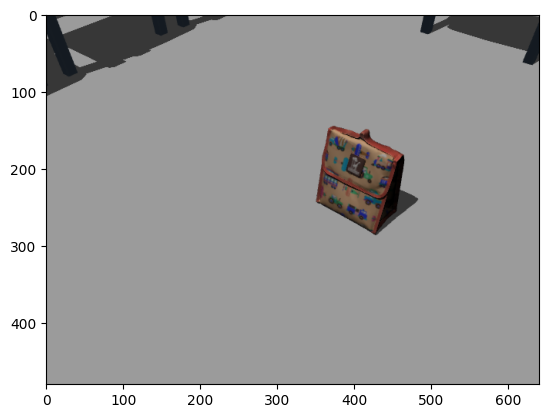

[ WARN] [1743783031.112426307]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.825000 according to authority /pose_integrator
[ WARN] [1743783031.112471498]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.825000 according to authority /pose_integrator
[ WARN] [1743783031.112499662]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.825000 according to authority /pose_integrator
[ WARN] [1743783031.112521764]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.825000 according to authority /pose_integrator
[ WARN] [1743783031.112542847]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 839.825000 according to authority /pose_integrator
[ WARN] [1743783031.112563834]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [117]:
plt.imshow(rgb_image)

In [118]:
try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())

        trans,rot=read_tf(trans)
        #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No head TF FOUND')
t= write_tf(trans,rot)
cloud_out = do_transform_cloud(points_msg, t)

[ WARN] [1743783035.924381337]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.038000 according to authority /pose_integrator
[ WARN] [1743783035.924440184]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.038000 according to authority /pose_integrator
[ WARN] [1743783035.924480095]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.038000 according to authority /pose_integrator
[ WARN] [1743783035.924518066]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.038000 according to authority /pose_integrator
[ WARN] [1743783035.924550438]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.038000 according to authority /pose_integrator
[ WARN] [1743783035.924577037]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [119]:
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(points_data.shape)

[ WARN] [1743783038.404733440]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.594000 according to authority /pose_integrator
[ WARN] [1743783038.404793213]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.594000 according to authority /pose_integrator
[ WARN] [1743783038.404837263]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.594000 according to authority /pose_integrator
[ WARN] [1743783038.404871953]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.594000 according to authority /pose_integrator
[ WARN] [1743783038.404914278]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 841.594000 according to authority /pose_integrator
[ WARN] [1743783038.404953348]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [122]:
orig_image= rgb_image.copy()
mask= np.zeros(corrected['z'].shape)#mask    

[ WARN] [1743783051.670839199]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 845.026000 according to authority /pose_integrator
[ WARN] [1743783051.670911307]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 845.026000 according to authority /pose_integrator
[ WARN] [1743783051.670982221]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 845.026000 according to authority /pose_integrator
[ WARN] [1743783051.671033287]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 845.026000 according to authority /pose_integrator
[ WARN] [1743783051.671100622]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 845.026000 according to authority /pose_integrator
[ WARN] [1743783051.671183690]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783058.179107611]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 846.878000 according to authority /pose_integrator
[ WARN] [1743783058.179193893]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 846.878000 according to authority /pose_integrator
[ WARN] [1743783058.179262839]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 846.878000 according to authority /pose_integrator
[ WARN] [1743783058.179322279]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 846.878000 according to authority /pose_integrator
[ WARN] [1743783058.179375264]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 846.878000 according to authority /pose_integrator
[ WARN] [1743783058.179427449]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783066.951909027]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 849.344000 according to authority /pose_integrator
[ WARN] [1743783066.951965978]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 849.344000 according to authority /pose_integrator
[ WARN] [1743783066.952001401]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 849.344000 according to authority /pose_integrator
[ WARN] [1743783066.952033231]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 849.344000 according to authority /pose_integrator
[ WARN] [1743783066.952065320]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 849.344000 according to authority /pose_integrator
[ WARN] [1743783066.952103619]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783082.967094418]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 853.657000 according to authority /pose_integrator
[ WARN] [1743783082.967161467]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 853.657000 according to authority /pose_integrator
[ WARN] [1743783082.967203174]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 853.657000 according to authority /pose_integrator
[ WARN] [1743783082.967254486]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 853.657000 according to authority /pose_integrator
[ WARN] [1743783082.967295149]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 853.657000 according to authority /pose_integrator
[ WARN] [1743783082.967332503]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [123]:
y_min=140
y_max=286
x_min=342
x_max=467
mask=cv2.rectangle(mask,(x_min,y_min),(x_max, y_max), (255,255,255), -1)

[ WARN] [1743783089.744287346]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.454000 according to authority /pose_integrator
[ WARN] [1743783089.744342163]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.454000 according to authority /pose_integrator
[ WARN] [1743783089.744377625]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.454000 according to authority /pose_integrator
[ WARN] [1743783089.744410590]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.454000 according to authority /pose_integrator
[ WARN] [1743783089.744443205]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.454000 according to authority /pose_integrator
[ WARN] [1743783089.744476121]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [124]:
#-----------------------------------------------------------------
def points_to_PCA(points):
    df=pd.DataFrame(points)
    df.columns=[['x','y','z']]
    threshold= df['z'].min().values[0]*0.998
    print (threshold)
    rslt_df = df.loc[df[df['z'] > threshold].index]
    points=rslt_df[['x','y','z']].dropna().values
    Pca=PCA(n_components=3)
    Pca.fit(points)
    print('Pca.explained_variance_',Pca.explained_variance_)
    ref=np.eye(3)
    pcas=Pca.components_
    R=[]
    R.append(np.dot(pcas[0],ref))
    R.append(np.dot(pcas[1],ref))
    R.append(np.dot(pcas[2],ref))
    R=np.asarray(R)
    ## HOMOGENEUS
    E_R= np.zeros((4,4))
    E_R[:3,:3]+=R
    E_R[-1,-1]=1
    return     E_R


[ WARN] [1743783090.951132896]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.789000 according to authority /pose_integrator
[ WARN] [1743783090.951182736]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.789000 according to authority /pose_integrator
[ WARN] [1743783090.951233637]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.789000 according to authority /pose_integrator
[ WARN] [1743783090.951288700]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.789000 according to authority /pose_integrator
[ WARN] [1743783090.951324792]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 855.789000 according to authority /pose_integrator
[ WARN] [1743783090.951356206]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [125]:
_, binary_image = cv2.threshold(mask, 20, 255, cv2.THRESH_BINARY)
individual_mask=(mask*binary_image).astype(np.uint8)        
cent=np.asarray(   ((  np.nanmean(corrected['x'][np.where(individual_mask==1)]) ,np.nanmean(corrected['y'][np.where(individual_mask==1)]),np.nanmean(corrected['z'][np.where(individual_mask==1)])       ))      )
points_c=np.asarray((corrected['x'][np.where(individual_mask==1)],corrected['y'][np.where(individual_mask==1)],corrected['z'][np.where(individual_mask==1)]))
print ( points_c.shape)
E_R=points_to_PCA(points_c.transpose())
e_ER=tf.transformations.euler_from_matrix(E_R)
quat_pca= tf. transformations.quaternion_from_euler(e_ER[0],e_ER[1],e_ER[2])
print("ANGLE:",tf.transformations.euler_from_matrix(E_R)," Degrees:",np.rad2deg(tf.transformations.euler_from_matrix(E_R)))

[ WARN] [1743783095.111843722]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 856.922000 according to authority /pose_integrator
[ WARN] [1743783095.111893431]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 856.922000 according to authority /pose_integrator
[ WARN] [1743783095.111921561]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 856.922000 according to authority /pose_integrator
[ WARN] [1743783095.111948396]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 856.922000 according to authority /pose_integrator
[ WARN] [1743783095.111972032]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 856.922000 according to authority /pose_integrator
[ WARN] [1743783095.111995768]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

(3, 18522)
6.549768334662076e-05
Pca.explained_variance_ [0.02822566 0.00766454 0.00727983]
ANGLE: (-0.3047336399667262, 0.18605542959088286, -2.56869424669053)  Degrees: [ -17.45995145   10.66019087 -147.17533919]


[ WARN] [1743783095.515775187]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 857.071000 according to authority /pose_integrator
[ WARN] [1743783095.515829838]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 857.071000 according to authority /pose_integrator
[ WARN] [1743783095.515852808]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 857.071000 according to authority /pose_integrator
[ WARN] [1743783095.515876057]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 857.071000 according to authority /pose_integrator
[ WARN] [1743783095.515901849]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 857.071000 according to authority /pose_integrator
[ WARN] [1743783095.515925418]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783102.234945915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 858.850000 according to authority /pose_integrator
[ WARN] [1743783102.234996822]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 858.850000 according to authority /pose_integrator
[ WARN] [1743783102.235026527]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 858.850000 according to authority /pose_integrator
[ WARN] [1743783102.235050270]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 858.850000 according to authority /pose_integrator
[ WARN] [1743783102.235077910]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 858.850000 according to authority /pose_integrator
[ WARN] [1743783102.235099717]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

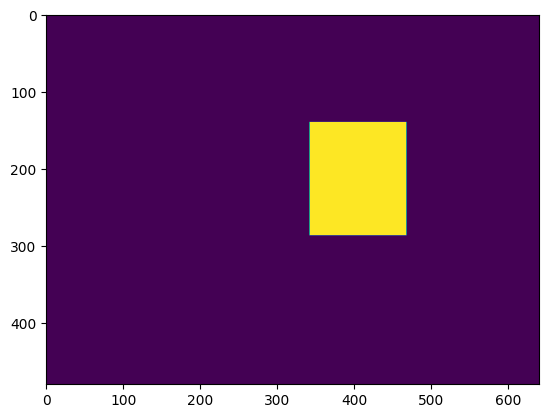

[ WARN] [1743783103.477665841]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.242000 according to authority /pose_integrator
[ WARN] [1743783103.477732724]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.242000 according to authority /pose_integrator
[ WARN] [1743783103.477775171]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.242000 according to authority /pose_integrator
[ WARN] [1743783103.477815515]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.242000 according to authority /pose_integrator
[ WARN] [1743783103.477853682]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.242000 according to authority /pose_integrator
[ WARN] [1743783103.477893361]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [126]:
plt.imshow(mask)

In [127]:
points_c=np.asarray((corrected['x'][np.where(individual_mask==1)],corrected['y'][np.where(individual_mask==1)],corrected['z'][np.where(individual_mask==1)]))
df=pd.DataFrame(points_c.transpose())
df.columns=['x','y','z']
df.describe()

,x,y,z
count,18522.000000,18522.000000,18522.000000
mean,1.370739,-2.017484,0.091928
std,0.147221,0.110371,0.096510
min,0.898683,-2.373412,0.000066
25%,1.368678,-2.073033,0.000089
50%,1.432219,-2.003415,0.061548
75%,1.451830,-1.928664,0.181513
max,1.576946,-1.819445,0.288456


[ WARN] [1743783104.219063579]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.435000 according to authority /pose_integrator
[ WARN] [1743783104.219118108]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.435000 according to authority /pose_integrator
[ WARN] [1743783104.219157878]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.435000 according to authority /pose_integrator
[ WARN] [1743783104.219199402]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.435000 according to authority /pose_integrator
[ WARN] [1743783104.219248602]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 859.435000 according to authority /pose_integrator
[ WARN] [1743783104.219311334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783106.880597990]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.137000 according to authority /pose_integrator
[ WARN] [1743783106.880678132]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.137000 according to authority /pose_integrator
[ WARN] [1743783106.880726603]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.137000 according to authority /pose_integrator
[ WARN] [1743783106.880764208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.137000 according to authority /pose_integrator
[ WARN] [1743783106.880802854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.137000 according to authority /pose_integrator
[ WARN] [1743783106.880866226]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

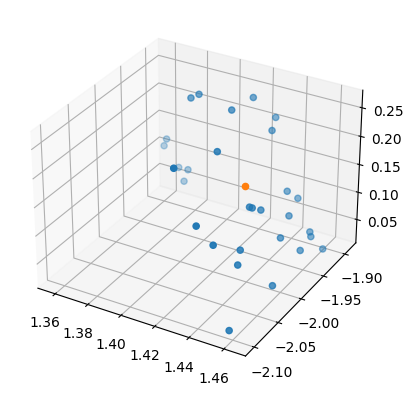

In [128]:
rslt_df = df[df['z'] > 0.02]
points=rslt_df[['x','y','z']].sample(30).values
#points=rslt_df[['x','y','z']].values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])
pt=rslt_df[['x','y','z']].mean().values
ax.scatter(pt[0],pt[1],pt[2],'o')

[ WARN] [1743783109.171587664]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.729000 according to authority /pose_integrator
[ WARN] [1743783109.171661505]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.729000 according to authority /pose_integrator
[ WARN] [1743783109.171710030]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.729000 according to authority /pose_integrator
[ WARN] [1743783109.171750437]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.729000 according to authority /pose_integrator
[ WARN] [1743783109.171786201]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 860.729000 according to authority /pose_integrator
[ WARN] [1743783109.171841091]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

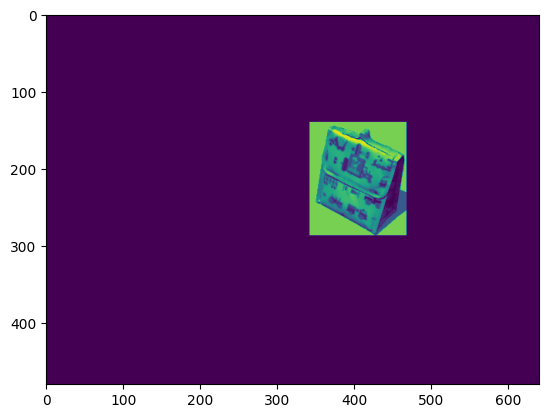

[ WARN] [1743783110.223992405]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 861.057000 according to authority /pose_integrator
[ WARN] [1743783110.224050473]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 861.057000 according to authority /pose_integrator
[ WARN] [1743783110.224082758]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 861.057000 according to authority /pose_integrator
[ WARN] [1743783110.224110434]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 861.057000 according to authority /pose_integrator
[ WARN] [1743783110.224143663]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 861.057000 according to authority /pose_integrator
[ WARN] [1743783110.224182614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

In [129]:
plt.imshow(mask*rgb_image[:,:,0])

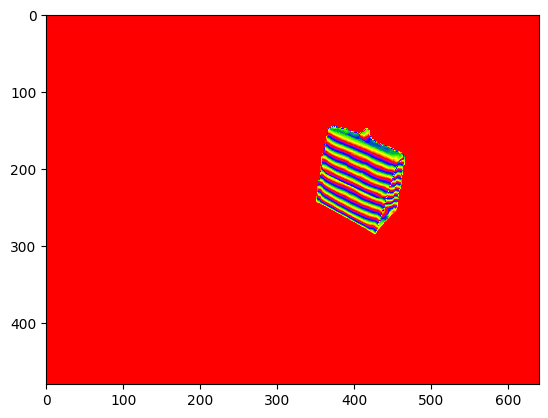

[ WARN] [1743783114.389373705]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 862.114000 according to authority /pose_integrator
[ WARN] [1743783114.389428545]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 862.114000 according to authority /pose_integrator
[ WARN] [1743783114.389463450]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 862.114000 according to authority /pose_integrator
[ WARN] [1743783114.389491468]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 862.114000 according to authority /pose_integrator
[ WARN] [1743783114.389518388]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 862.114000 according to authority /pose_integrator
[ WARN] [1743783114.389545528]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783122.559596090]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 864.244000 according to authority /pose_integrator
[ WARN] [1743783122.559660504]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 864.244000 according to authority /pose_integrator
[ WARN] [1743783122.559700504]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 864.244000 according to authority /pose_integrator
[ WARN] [1743783122.559738186]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 864.244000 according to authority /pose_integrator
[ WARN] [1743783122.559765514]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 864.244000 according to authority /pose_integrator
[ WARN] [1743783122.559789403]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783135.930644438]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 867.677000 according to authority /pose_integrator
[ WARN] [1743783135.930719295]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 867.677000 according to authority /pose_integrator
[ WARN] [1743783135.930769579]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 867.677000 according to authority /pose_integrator
[ WARN] [1743783135.930823310]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 867.677000 according to authority /pose_integrator
[ WARN] [1743783135.930889613]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 867.677000 according to authority /pose_integrator
[ WARN] [1743783135.930935972]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783143.108868247]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 869.725000 according to authority /pose_integrator
[ WARN] [1743783143.108914483]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 869.725000 according to authority /pose_integrator
[ WARN] [1743783143.108947461]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 869.725000 according to authority /pose_integrator
[ WARN] [1743783143.108975172]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 869.725000 according to authority /pose_integrator
[ WARN] [1743783143.109006745]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 869.725000 according to authority /pose_integrator
[ WARN] [1743783143.109036589]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783161.283405478]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 874.613000 according to authority /pose_integrator
[ WARN] [1743783161.283473618]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 874.613000 according to authority /pose_integrator
[ WARN] [1743783161.283513447]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 874.613000 according to authority /pose_integrator
[ WARN] [1743783161.283548573]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 874.613000 according to authority /pose_integrator
[ WARN] [1743783161.283582308]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 874.613000 according to authority /pose_integrator
[ WARN] [1743783161.283619115]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783170.075554852]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 876.964000 according to authority /pose_integrator
[ WARN] [1743783170.075604203]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 876.964000 according to authority /pose_integrator
[ WARN] [1743783170.075636554]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 876.964000 according to authority /pose_integrator
[ WARN] [1743783170.075672345]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 876.964000 according to authority /pose_integrator
[ WARN] [1743783170.075705362]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 876.964000 according to authority /pose_integrator
[ WARN] [1743783170.075741830]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783182.243667792]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 880.068000 according to authority /pose_integrator
[ WARN] [1743783182.243723077]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 880.068000 according to authority /pose_integrator
[ WARN] [1743783182.243752615]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 880.068000 according to authority /pose_integrator
[ WARN] [1743783182.243782400]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 880.068000 according to authority /pose_integrator
[ WARN] [1743783182.243806666]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 880.068000 according to authority /pose_integrator
[ WARN] [1743783182.243831543]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783188.583759893]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 881.890000 according to authority /pose_integrator
[ WARN] [1743783188.583826184]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 881.890000 according to authority /pose_integrator
[ WARN] [1743783188.583872093]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 881.890000 according to authority /pose_integrator
[ WARN] [1743783188.583908733]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 881.890000 according to authority /pose_integrator
[ WARN] [1743783188.583933337]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 881.890000 according to authority /pose_integrator
[ WARN] [1743783188.583955502]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783193.921604233]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 883.336000 according to authority /pose_integrator
[ WARN] [1743783193.921669707]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 883.336000 according to authority /pose_integrator
[ WARN] [1743783193.921714732]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 883.336000 according to authority /pose_integrator
[ WARN] [1743783193.921761609]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 883.336000 according to authority /pose_integrator
[ WARN] [1743783193.921803448]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 883.336000 according to authority /pose_integrator
[ WARN] [1743783193.921839568]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783201.693602641]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 885.443000 according to authority /pose_integrator
[ WARN] [1743783201.693651533]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 885.443000 according to authority /pose_integrator
[ WARN] [1743783201.693691234]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 885.443000 according to authority /pose_integrator
[ WARN] [1743783201.693725219]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 885.443000 according to authority /pose_integrator
[ WARN] [1743783201.693762735]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 885.443000 according to authority /pose_integrator
[ WARN] [1743783201.693800927]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783213.226255735]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 888.396000 according to authority /pose_integrator
[ WARN] [1743783213.226308319]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 888.396000 according to authority /pose_integrator
[ WARN] [1743783213.226352863]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 888.396000 according to authority /pose_integrator
[ WARN] [1743783213.226390091]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 888.396000 according to authority /pose_integrator
[ WARN] [1743783213.226420372]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 888.396000 according to authority /pose_integrator
[ WARN] [1743783213.226445633]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783229.966869056]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 892.573000 according to authority /pose_integrator
[ WARN] [1743783229.966929821]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 892.573000 according to authority /pose_integrator
[ WARN] [1743783229.966979957]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 892.573000 according to authority /pose_integrator
[ WARN] [1743783229.967023850]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 892.573000 according to authority /pose_integrator
[ WARN] [1743783229.967066545]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 892.573000 according to authority /pose_integrator
[ WARN] [1743783229.967101560]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783236.639215809]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 894.382000 according to authority /pose_integrator
[ WARN] [1743783236.639289093]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 894.382000 according to authority /pose_integrator
[ WARN] [1743783236.639345281]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 894.382000 according to authority /pose_integrator
[ WARN] [1743783236.639392914]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 894.382000 according to authority /pose_integrator
[ WARN] [1743783236.639437970]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 894.382000 according to authority /pose_integrator
[ WARN] [1743783236.639482036]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783252.130339274]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 898.432000 according to authority /pose_integrator
[ WARN] [1743783252.130430757]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 898.432000 according to authority /pose_integrator
[ WARN] [1743783252.130484362]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 898.432000 according to authority /pose_integrator
[ WARN] [1743783252.130527630]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 898.432000 according to authority /pose_integrator
[ WARN] [1743783252.130580157]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 898.432000 according to authority /pose_integrator
[ WARN] [1743783252.130648343]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 8

[ WARN] [1743783264.965747929]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 901.697000 according to authority /pose_integrator
[ WARN] [1743783264.965801134]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 901.697000 according to authority /pose_integrator
[ WARN] [1743783264.965838405]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 901.697000 according to authority /pose_integrator
[ WARN] [1743783264.965869909]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 901.697000 according to authority /pose_integrator
[ WARN] [1743783264.965907452]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 901.697000 according to authority /pose_integrator
[ WARN] [1743783264.965946235]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783277.284387869]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 904.984000 according to authority /pose_integrator
[ WARN] [1743783277.284445025]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 904.984000 according to authority /pose_integrator
[ WARN] [1743783277.284483512]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 904.984000 according to authority /pose_integrator
[ WARN] [1743783277.284516726]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 904.984000 according to authority /pose_integrator
[ WARN] [1743783277.284549296]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 904.984000 according to authority /pose_integrator
[ WARN] [1743783277.284581018]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783284.572312084]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 906.986000 according to authority /pose_integrator
[ WARN] [1743783284.572357138]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 906.986000 according to authority /pose_integrator
[ WARN] [1743783284.572394289]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 906.986000 according to authority /pose_integrator
[ WARN] [1743783284.572420984]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 906.986000 according to authority /pose_integrator
[ WARN] [1743783284.572444649]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 906.986000 according to authority /pose_integrator
[ WARN] [1743783284.572468359]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783291.595441149]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 908.939000 according to authority /pose_integrator
[ WARN] [1743783291.595513066]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 908.939000 according to authority /pose_integrator
[ WARN] [1743783291.595565270]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 908.939000 according to authority /pose_integrator
[ WARN] [1743783291.595607321]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 908.939000 according to authority /pose_integrator
[ WARN] [1743783291.595668323]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 908.939000 according to authority /pose_integrator
[ WARN] [1743783291.595713903]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783301.341889120]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 911.419000 according to authority /pose_integrator
[ WARN] [1743783301.341950760]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 911.419000 according to authority /pose_integrator
[ WARN] [1743783301.341982938]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 911.419000 according to authority /pose_integrator
[ WARN] [1743783301.342021313]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 911.419000 according to authority /pose_integrator
[ WARN] [1743783301.342062975]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 911.419000 according to authority /pose_integrator
[ WARN] [1743783301.342100661]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783309.966868854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 913.350000 according to authority /pose_integrator
[ WARN] [1743783309.966942330]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 913.350000 according to authority /pose_integrator
[ WARN] [1743783309.966982337]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 913.350000 according to authority /pose_integrator
[ WARN] [1743783309.967020475]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 913.350000 according to authority /pose_integrator
[ WARN] [1743783309.967056976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 913.350000 according to authority /pose_integrator
[ WARN] [1743783309.967093874]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783321.839599745]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 916.307000 according to authority /pose_integrator
[ WARN] [1743783321.839648170]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 916.307000 according to authority /pose_integrator
[ WARN] [1743783321.839679133]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 916.307000 according to authority /pose_integrator
[ WARN] [1743783321.839709122]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 916.307000 according to authority /pose_integrator
[ WARN] [1743783321.839754514]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 916.307000 according to authority /pose_integrator
[ WARN] [1743783321.839785462]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783336.158495892]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 919.232000 according to authority /pose_integrator
[ WARN] [1743783336.158556952]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 919.232000 according to authority /pose_integrator
[ WARN] [1743783336.158602905]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 919.232000 according to authority /pose_integrator
[ WARN] [1743783336.158638331]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 919.232000 according to authority /pose_integrator
[ WARN] [1743783336.158672735]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 919.232000 according to authority /pose_integrator
[ WARN] [1743783336.158699874]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783355.639769486]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 923.407000 according to authority /pose_integrator
[ WARN] [1743783355.639818411]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 923.407000 according to authority /pose_integrator
[ WARN] [1743783355.639848568]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 923.407000 according to authority /pose_integrator
[ WARN] [1743783355.639875822]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 923.407000 according to authority /pose_integrator
[ WARN] [1743783355.639903428]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 923.407000 according to authority /pose_integrator
[ WARN] [1743783355.639931592]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783365.972561703]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 925.860000 according to authority /pose_integrator
[ WARN] [1743783365.972608300]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 925.860000 according to authority /pose_integrator
[ WARN] [1743783365.972638833]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 925.860000 according to authority /pose_integrator
[ WARN] [1743783365.972669025]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 925.860000 according to authority /pose_integrator
[ WARN] [1743783365.972697064]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 925.860000 according to authority /pose_integrator
[ WARN] [1743783365.972727021]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783373.082058609]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 927.497000 according to authority /pose_integrator
[ WARN] [1743783373.082104744]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 927.497000 according to authority /pose_integrator
[ WARN] [1743783373.082139171]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 927.497000 according to authority /pose_integrator
[ WARN] [1743783373.082166616]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 927.497000 according to authority /pose_integrator
[ WARN] [1743783373.082191847]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 927.497000 according to authority /pose_integrator
[ WARN] [1743783373.082216077]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783392.306244217]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 931.905000 according to authority /pose_integrator
[ WARN] [1743783392.306291563]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 931.905000 according to authority /pose_integrator
[ WARN] [1743783392.306321362]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 931.905000 according to authority /pose_integrator
[ WARN] [1743783392.306349053]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 931.905000 according to authority /pose_integrator
[ WARN] [1743783392.306376139]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 931.905000 according to authority /pose_integrator
[ WARN] [1743783392.306402645]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783423.438864603]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 938.959000 according to authority /pose_integrator
[ WARN] [1743783423.438917539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 938.959000 according to authority /pose_integrator
[ WARN] [1743783423.438946809]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 938.959000 according to authority /pose_integrator
[ WARN] [1743783423.438974434]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 938.959000 according to authority /pose_integrator
[ WARN] [1743783423.439001920]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 938.959000 according to authority /pose_integrator
[ WARN] [1743783423.439029885]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

[ WARN] [1743783459.691195833]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 947.771000 according to authority /pose_integrator
[ WARN] [1743783459.691262950]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 947.771000 according to authority /pose_integrator
[ WARN] [1743783459.691298710]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 947.771000 according to authority /pose_integrator
[ WARN] [1743783459.691327835]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 947.771000 according to authority /pose_integrator
[ WARN] [1743783459.691362028]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 947.771000 according to authority /pose_integrator
[ WARN] [1743783459.691392925]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 9

In [130]:
plt.imshow(mask*corrected['z'],cmap='prism')